<a href="https://colab.research.google.com/github/sdgroeve/EuBIC2022_workshop_ML/blob/main/mnist_digit_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST digit classification


In [1]:
# Importing modules
import pandas as pd
import numpy as np
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### Load the MNIST dataset with Scikit-learn

In [2]:
# Importing data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', cache=False)

### The features: pixel values

In [3]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


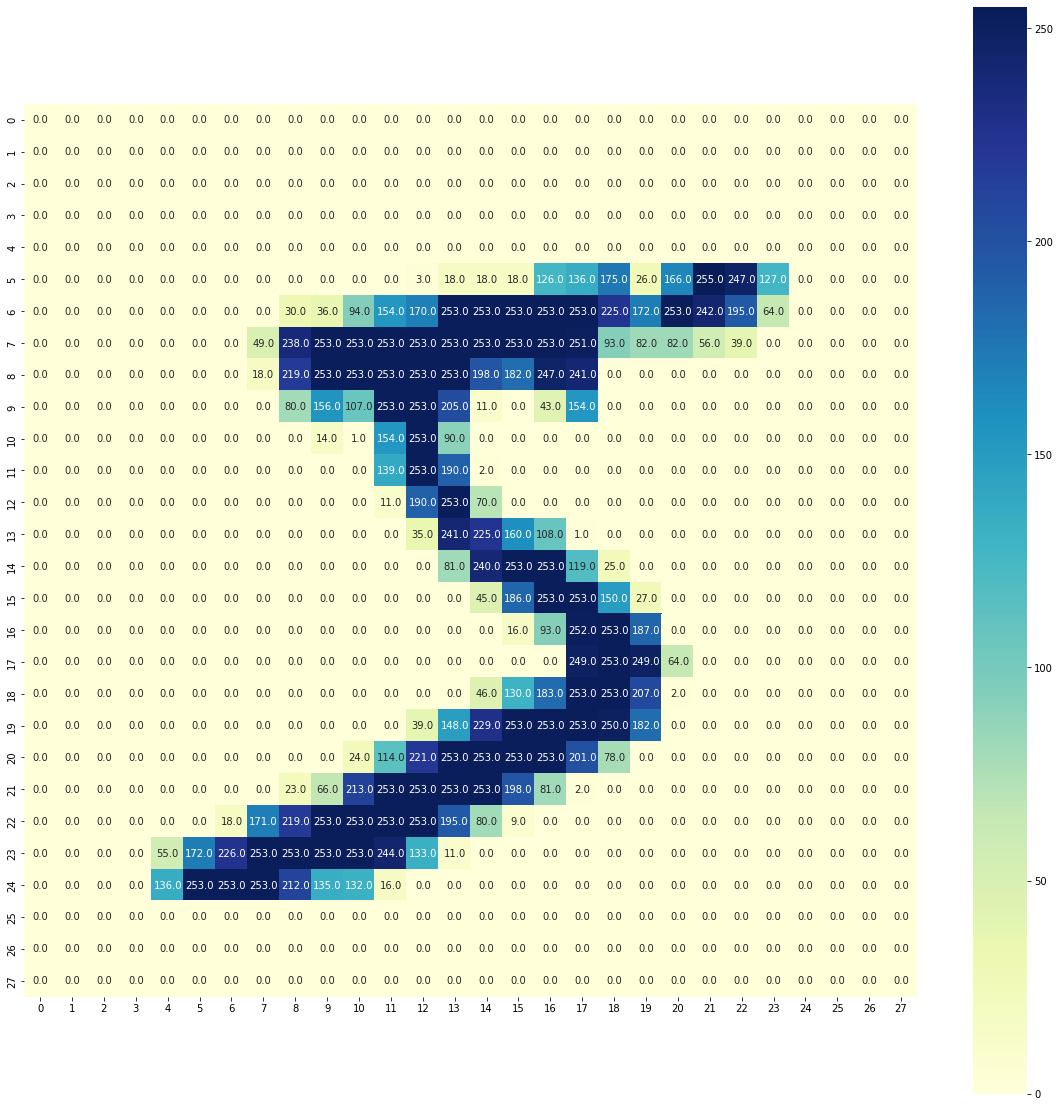

In [24]:
img = np.array(mnist.data.iloc[0])
img = np.resize(img, (28, 28))

plt.figure(figsize=(20, 20))
sns.heatmap(img, annot=True, fmt='.1f', square=True, cmap="YlGnBu")
plt.show()

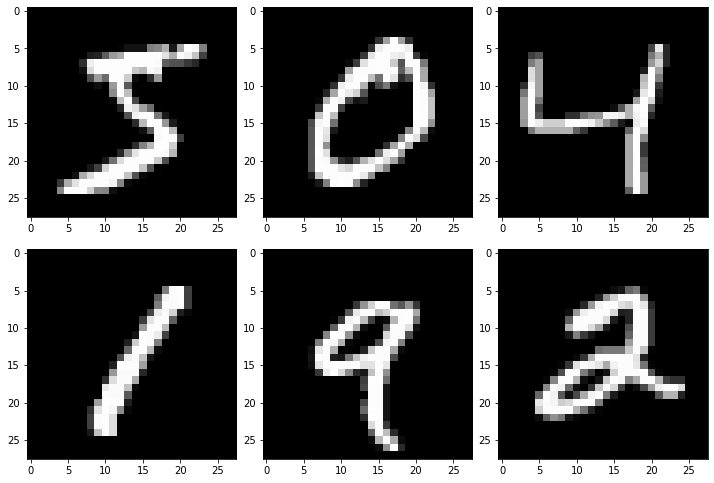

In [5]:
# Viewing the images
index_to_view = 0
number_of_images = 6

def view_image(ds, index_to_view, cmap="gray"):
    image = np.array(ds.iloc[index_to_view])
    image = np.resize(image, (28, 28))
    plt.imshow(image, cmap)
    

plt.figure(figsize=(10, 10))
for i in range(number_of_images):
    plt.subplot(round(number_of_images/2), round(number_of_images/2), i+1)
    view_image(mnist.data, i)

plt.tight_layout()

### Feature normalization

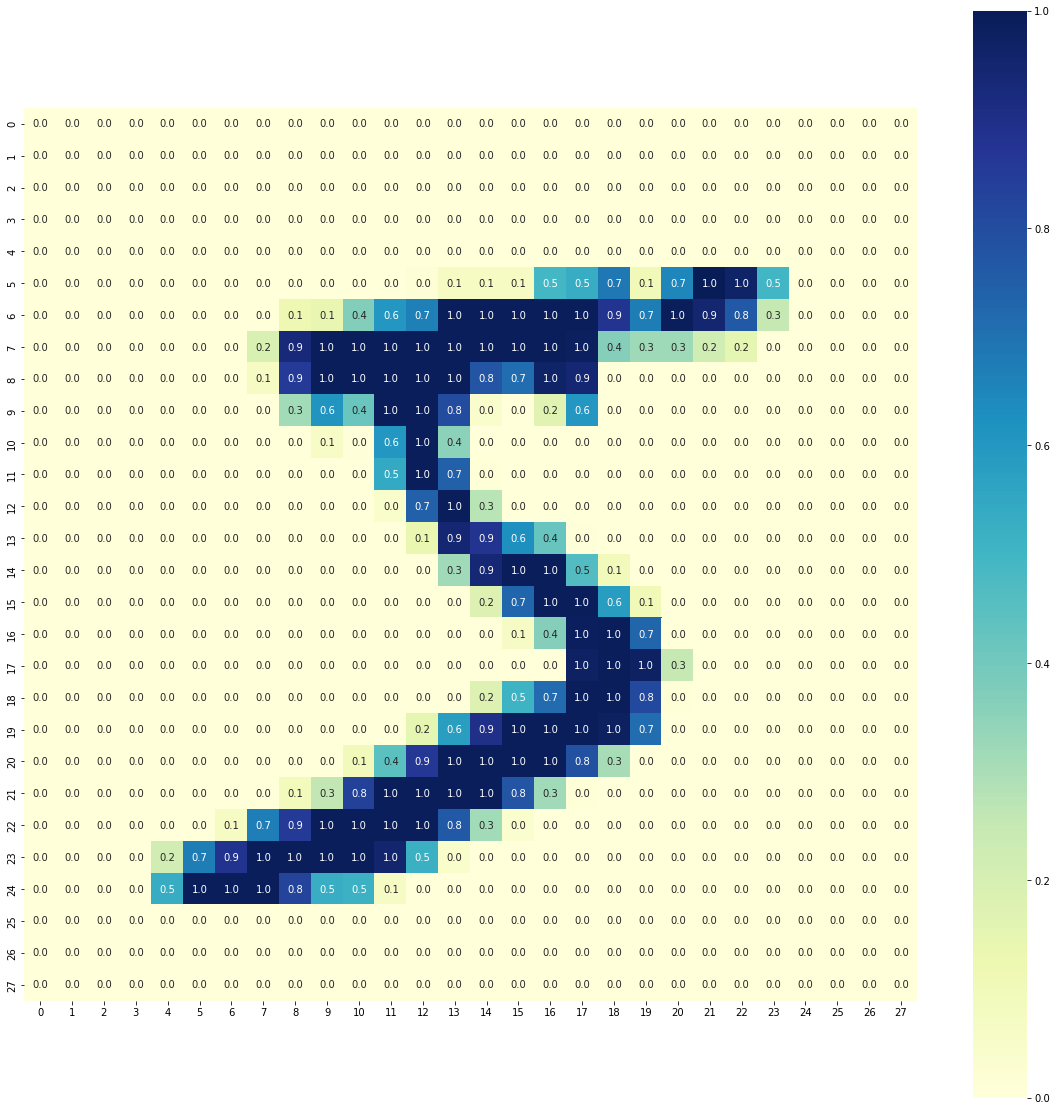

In [6]:
img = np.array(mnist.data.iloc[0]) / 255
img = np.resize(img, (28, 28))

plt.figure(figsize=(20, 20))
sns.heatmap(img, annot=True, fmt='.1f', square=True, cmap="YlGnBu")
plt.show()

### Splitting the data

In [7]:
X_train_ds = mnist.data.iloc[:60000,:] / 255
y_train_ds = mnist.target.iloc[:60000]
X_test_ds = mnist.data.iloc[60000:,:] / 255
y_test_ds = mnist.target.iloc[60000:]

### Exploring the labels

Text(0, 0.5, 'Count')

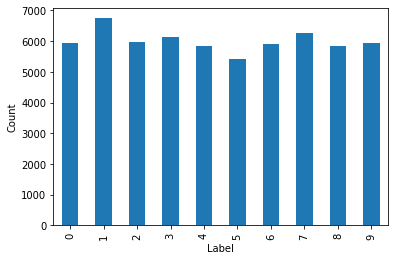

In [8]:
y_train_valuec = y_train_ds.value_counts().sort_index()
y_train_valuec.plot(kind='bar')
plt.xlabel("Label")
plt.ylabel("Count")

### Let's focus on binary classification

In [9]:
to_predict = '8'

y_train_label = [1 if x == to_predict else 0 for x in y_train_ds]

### Fit a logistic regression model

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
#model = RandomForestClassifier()

model.fit(X_train_ds, y_train_label)
print(model)

LogisticRegression()


In [11]:
predictions = model.predict(X_test_ds)
print(predictions)

[0 0 0 ... 0 0 0]


In [12]:
from sklearn.metrics import accuracy_score

y_test_label = [1 if x == to_predict else 0 for x in y_test_ds]

print(accuracy_score(y_test_label,predictions))

0.9612


### How performant is an ignorant model that always predicts "not 8"?

In [13]:
predictions_baseline = [0]*len(predictions)
print(accuracy_score(y_test_label,predictions_baseline))

0.9026


### Better metrics for evaluation

In [14]:
predictions_proba = model.predict_proba(X_test_ds)
print(predictions_proba)

[[9.99957771e-01 4.22289444e-05]
 [9.99926407e-01 7.35932882e-05]
 [9.96272132e-01 3.72786813e-03]
 ...
 [8.93869459e-01 1.06130541e-01]
 [7.60672839e-01 2.39327161e-01]
 [9.99998445e-01 1.55535421e-06]]


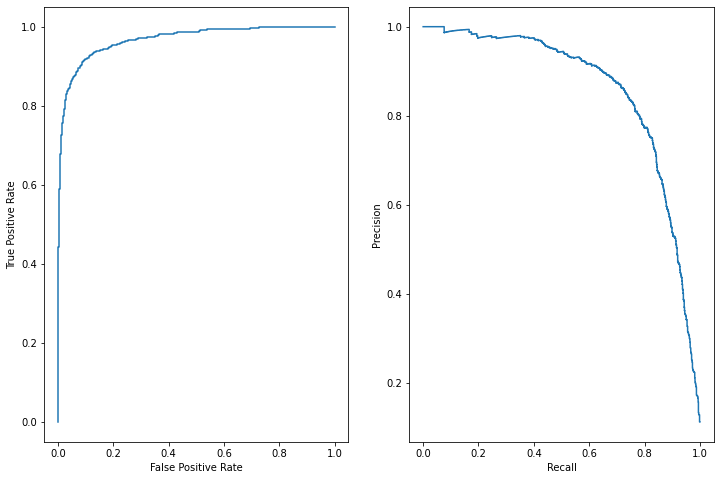

In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay

y_score = predictions_proba[:,1]

fpr, tpr, _ = roc_curve(y_test_label, y_score, pos_label=model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

prec, recall, _ = precision_recall_curve(y_test_label, y_score, pos_label=model.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

In [16]:
import sklearn.metrics as metrics

print(metrics.recall_score(y_test_label, predictions))
print(metrics.precision_score(y_test_label, predictions))
print()
print(metrics.f1_score(y_test_label, predictions))

0.7412731006160165
0.8414918414918415

0.7882096069868997


### The modelparameter values

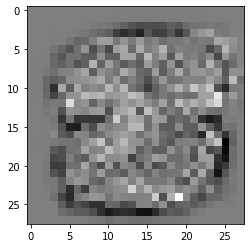

In [17]:
image = np.resize(model.coef_[0], (28, 28))
plt.imshow(image, "gray")
plt.show()

### Prediction performance for all classes

0 0.961013


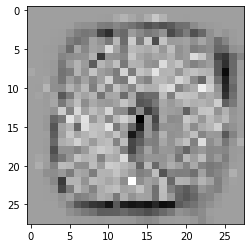

1 0.972356


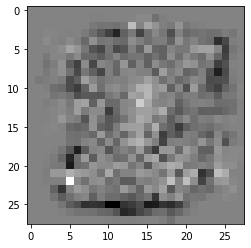

2 0.899233


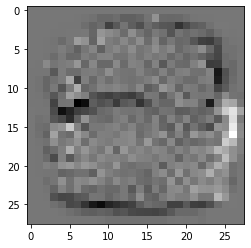

3 0.886283


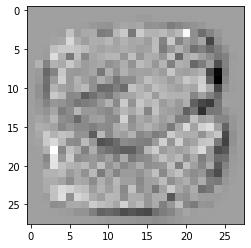

4 0.915888


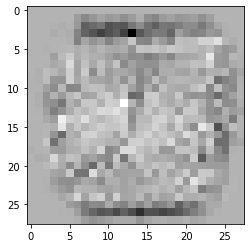

5 0.869412


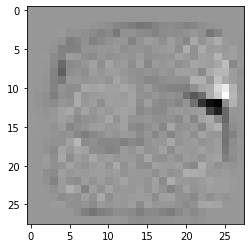

6 0.923644


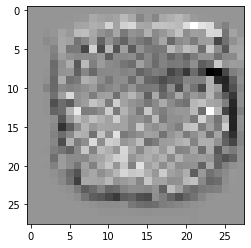

7 0.922469


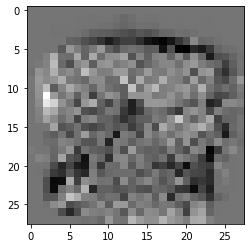

8 0.788210


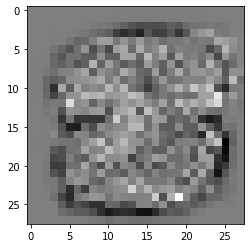

9 0.834853


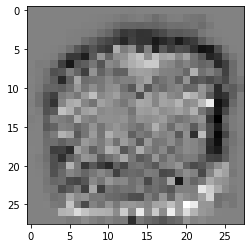

In [18]:
for label in range(10):
  y_train_label = [1 if x == str(label) else 0 for x in y_train_ds]
  y_test_label  = [1 if x == str(label) else 0 for x in y_test_ds]
  model.fit(X_train_ds, y_train_label)
  predictions = model.predict(X_test_ds)
  print("%i %f"%(label,metrics.f1_score(y_test_label, predictions)))

### Multi-class classification

In [31]:
#model.fit(X_train_ds, y_train_ds)
predictions = model.predict(X_test_ds)
print(predictions)

['7' '2' '1' ... '4' '5' '6']


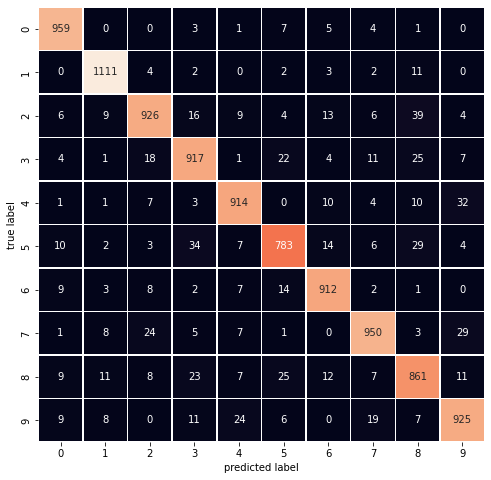

In [33]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

plot_confusion_matrix(y_test_ds, predictions)

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test_ds, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.93       982
           5       0.91      0.88      0.89       892
           6       0.94      0.95      0.94       958
           7       0.94      0.92      0.93      1028
           8       0.87      0.88      0.88       974
           9       0.91      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



### Example predictions

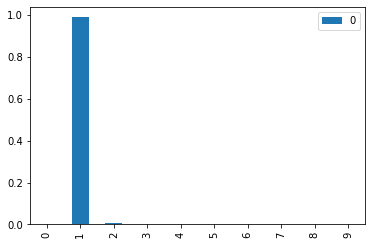

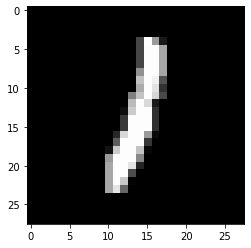

In [20]:
from random import randint

idx = randint(0,len(X_test_ds)-1)

pd.DataFrame(predictions_proba[idx]).plot.bar()
plt.show()
image = np.resize(X_test_ds.iloc[idx,:], (28, 28))
plt.imshow(image, "gray")
plt.show()

In [25]:
from PIL import Image

image = Image.open('chicken.jpg').convert('LA').resize((28,28))
plt.imshow(image, "gray")
plt.show()

FileNotFoundError: ignored

In [ ]:
pred = model.predict_proba(np.resize(image,(1,784)))

In [ ]:
pred

In [ ]:
test_predictions = model.predict(test_ds.iloc[:,:-1])
test_predictions